<a href="https://colab.research.google.com/github/ilEnzio/Sexy_In_The_City/blob/master/Photography_Dataset_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# parse_dates=["datetime"]
dates = ["Date_of_PreShoot", "DOB"]

In [3]:
dnd_df = pd.read_csv("https://raw.githubusercontent.com/ilEnzio/Sexy_In_The_City/master/DND%20data_3.csv", parse_dates=dates)

In [4]:
dnd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_of_PreShoot  422 non-null    datetime64[ns]
 1   Session_Fee       422 non-null    object        
 2   Hair              422 non-null    object        
 3   DOB               424 non-null    object        
 4   zip_code          422 non-null    object        
 5   Sales_total       326 non-null    object        
 6   Model Release     324 non-null    object        
 7   Favorite          218 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 26.6+ KB


In [5]:

dnd_df.shape

(424, 8)

In [6]:
dnd_df.head()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,2017-01-05,99,yes,5/5/1976,32208,600,yes,butt
1,2017-11-02,99,yes,10/16/1984,32082,400,no,"butt, eyes"
2,2017-06-29,99,yes,7/22/1989,32080,320,no,"eyes, hair, legs"
3,2017-01-23,99,no,1/23/1971,32208,720,yes,boobs
4,2014-04-25,99,yes,6/6/1994,32034,NaN,NaN,NaN


In [7]:
dnd_df.describe()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
count,422,422,422,424,422,326,324,218
unique,321,10,4,413,82,69,5,65
top,2013-12-04 00:00:00,99,no,12/26/1977,32218,600,yes,butt
freq,4,289,302,2,27,83,211,77
first,1988-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-11-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dnd_df.describe(exclude="number")

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
count,422,422,422,424,422,326,324,218
unique,321,10,4,413,82,69,5,65
top,2013-12-04 00:00:00,99,no,12/26/1977,32218,600,yes,butt
freq,4,289,302,2,27,83,211,77
first,1988-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-11-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dnd_df.columns

Index(['Date_of_PreShoot', 'Session_Fee', 'Hair', 'DOB', 'zip_code',
       'Sales_total', 'Model Release', 'Favorite'],
      dtype='object')

In [10]:
dnd_df.isnull().sum()

Date_of_PreShoot      2
Session_Fee           2
Hair                  2
DOB                   0
zip_code              2
Sales_total          98
Model Release       100
Favorite            206
dtype: int64

In [11]:
# lets check out the Favorite feature
dnd_df["Favorite"].value_counts()

butt                       77
boobs                      37
legs                       12
eyes                        9
butt, eyes                  8
                           ..
butt, curves, face          1
butt, eyes, legs            1
abs, butt                   1
cheek_bones, eyes, lips     1
butt, curves                1
Name: Favorite, Length: 65, dtype: int64

In [12]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace=np.NaN, value="no preference")

In [13]:
#list to fix boob; boob, legs; boob, smile; butt , legs; eyes,  legs

In [14]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace="boob", value="boobs")

In [15]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace="boob, legs", value="boobs, legs")

In [16]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace="boob, smile", value="boobs, smile")

In [17]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace="butt , legs", value="butt, legs")

In [18]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace="eyes,  legs", value="eyes, legs")

In [19]:
dnd_df["Favorite"].nunique()

62

In [20]:
dnd_df.isnull().sum()

Date_of_PreShoot      2
Session_Fee           2
Hair                  2
DOB                   0
zip_code              2
Sales_total          98
Model Release       100
Favorite              0
dtype: int64

In [21]:
# drop the rows where sale is Nan
# create a condition where sales is nan 
# drop those rows

# no_sales_condition = dnd_df["Sales_total"][:] == np.NaN

In [22]:
dnd_sales_df =dnd_df.dropna(subset=["Sales_total"])

In [23]:
dnd_df.shape

(424, 8)

In [24]:
dnd_sales_df.shape

(326, 8)

In [25]:
dnd_sales_df.isnull().sum()

Date_of_PreShoot    2
Session_Fee         2
Hair                2
DOB                 0
zip_code            0
Sales_total         0
Model Release       8
Favorite            0
dtype: int64

In [26]:
dnd_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 423
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_of_PreShoot  324 non-null    datetime64[ns]
 1   Session_Fee       324 non-null    object        
 2   Hair              324 non-null    object        
 3   DOB               326 non-null    object        
 4   zip_code          326 non-null    object        
 5   Sales_total       326 non-null    object        
 6   Model Release     318 non-null    object        
 7   Favorite          326 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 22.9+ KB


In [27]:
dnd_sales_df.head(10)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,2017-01-05,99,yes,5/5/1976,32208,600,yes,butt
1,2017-11-02,99,yes,10/16/1984,32082,400,no,"butt, eyes"
2,2017-06-29,99,yes,7/22/1989,32080,320,no,"eyes, hair, legs"
3,2017-01-23,99,no,1/23/1971,32208,720,yes,boobs
5,2014-09-14,99,yes,11/3/1982,32257,1320,no,butt
6,2017-09-05,99,no,1/24/1996,32246,0,yes,eyes
7,2015-08-14,179,no,8/29/1977,32221,240,no,no preference
9,2015-03-05,99,yes,9/7/1979,32277,720,yes,boobs
10,2015-01-21,99,yes,8/4/1988,32258,680,yes,eyes
12,2014-09-27,99,no,11/10/1969,32216,600,yes,no preference


In [28]:
dnd_sales_df["Sales_total"].nunique()

69

In [29]:
# try converting to str, then to int
# test= dnd_sales_df["Sales_total"].astype(str).astype(int)
# test

In [30]:
# find this 866.7...
cond = dnd_sales_df["Sales_total"] == "866.7"

In [31]:
temp_df = dnd_sales_df[cond]
temp_df

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
133,2013-08-02,99,no,10/5/1980,32218,866.7,yes,no preference


In [32]:
dnd_sales_df.loc[133, "Sales_total"] = 860
dnd_sales_df.loc[133, "Sales_total"] 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


860

In [33]:
# try again now that I got rid of decimal 
# test= dnd_sales_df["Sales_total"].astype(str).astype(int)
# test


In [34]:
# so now maybe there is a space?
cond2 = dnd_sales_df["Sales_total"] == " "
dnd_sales_df[cond2]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
222,2014-10-21,99,yes,11/29/1969,32073,,,no preference


In [35]:
# lets drop this row...

dnd_sales_df = dnd_sales_df.drop(labels=222)


In [36]:
# see if 222 is there
dnd_sales_df[cond2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite


In [37]:
#perfect so far; try to convert one more time 
dnd_sales_df["Sales_total"]= dnd_sales_df["Sales_total"].astype(str).astype(int)
dnd_sales_df.describe()

,Sales_total
count,325.000000
mean,738.095385
std,475.472871
min,0.000000
25%,580.000000
50%,600.000000
75%,950.000000
max,3000.000000


In [38]:
dnd_sales_df.head()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,2017-01-05,99,yes,5/5/1976,32208,600,yes,butt
1,2017-11-02,99,yes,10/16/1984,32082,400,no,"butt, eyes"
2,2017-06-29,99,yes,7/22/1989,32080,320,no,"eyes, hair, legs"
3,2017-01-23,99,no,1/23/1971,32208,720,yes,boobs
5,2014-09-14,99,yes,11/3/1982,32257,1320,no,butt


In [39]:
dnd_sales_df["Session_Fee"].nunique()

8

In [40]:
dnd_sales_df["Session_Fee"].value_counts()

99             230
25              51
179             33
249              4
0                2
89               1
100              1
amazon gift      1
Name: Session_Fee, dtype: int64

In [41]:
#ok lets change that amazon gift to 0
cond_gift = dnd_sales_df["Session_Fee"].str.strip() == "amazon gift"

In [42]:
dnd_sales_df[cond_gift]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
160,2014-04-02,amazon gift,yes,12/17/1980,32164,600,yes,butt


In [43]:
dnd_sales_df.loc[160, "Session_Fee"] =dnd_sales_df.loc[160, "Session_Fee"].strip()


In [44]:
# replace "amazon gift" with 0 
dnd_sales_df.loc[:, "Session_Fee"] = dnd_sales_df.loc[:,"Session_Fee"].replace(to_replace="amazon gift", value="0")

In [45]:
# check to see if its gone
dnd_sales_df[cond_gift]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
160,2014-04-02,0,yes,12/17/1980,32164,600,yes,butt


In [46]:
dnd_sales_df["Session_Fee"].value_counts()

99     230
25      51
179     33
249      4
0        3
89       1
100      1
Name: Session_Fee, dtype: int64

In [47]:
dnd_sales_df["Session_Fee"].isnull().sum()


2

In [48]:
# These were repeat clients where a second preshoot wasn't necessary 
# or a purchase of additional photos... So i have to manually update it 
# will export a "clean" csv later
cond_nan = dnd_sales_df["Session_Fee"].isnull() == True
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,NaT,NaN,NaN,2/8/1983,32211,1200,yes,no preference
51,NaT,NaN,NaN,8/24/1979,32225,600,yes,boobs


In [49]:
dnd_sales_df.loc[33, "Session_Fee"] = "179"
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,NaT,179,NaN,2/8/1983,32211,1200,yes,no preference
51,NaT,NaN,NaN,8/24/1979,32225,600,yes,boobs


In [50]:
dnd_sales_df.loc[51, "Session_Fee"] = "99"
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,NaT,179,NaN,2/8/1983,32211,1200,yes,no preference
51,NaT,99,NaN,8/24/1979,32225,600,yes,boobs


In [51]:
dnd_sales_df.loc[:, "Hair"] = dnd_sales_df.loc[:, "Hair"].replace(to_replace=np.NaN, value="no")
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,NaT,179,no,2/8/1983,32211,1200,yes,no preference
51,NaT,99,no,8/24/1979,32225,600,yes,boobs


In [52]:
dnd_sales_df.loc[33, "Date_of_PreShoot"] = pd.to_datetime("3/22/2017")
dnd_sales_df.loc[51, "Date_of_PreShoot"] = pd.to_datetime("1/30/2016")
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,2017-03-22,179,no,2/8/1983,32211,1200,yes,no preference
51,2016-01-30,99,no,8/24/1979,32225,600,yes,boobs


In [53]:
cond_nan = dnd_sales_df["DOB"].isnull() == True
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite


In [54]:
dnd_sales_df.loc[233, "DOB"] = pd.to_datetime("4/15/1962")
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite


In [55]:
dnd_sales_df["DOB"].isnull().sum()

0

In [56]:
dnd_sales_df.head(2)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,2017-01-05,99,yes,5/5/1976,32208,600,yes,butt
1,2017-11-02,99,yes,10/16/1984,32082,400,no,"butt, eyes"


In [57]:
# the DOB isn't converted; I believe at this point its clean enough convert
dnd_sales_df.loc[:, "DOB"] = pd.to_datetime(dnd_sales_df.loc[:, "DOB"])
dnd_sales_df["DOB"]

0     1976-05-05
1     1984-10-16
2     1989-07-22
3     1971-01-23
5     1982-11-03
         ...    
414   1984-10-24
419   1987-03-28
421   1989-07-10
422   1992-08-05
423   1994-06-26
Name: DOB, Length: 325, dtype: datetime64[ns]

In [58]:
dnd_sales_df.loc[77, "Date_of_PreShoot"] = pd.to_datetime("11/14/2016")
dnd_sales_df.loc[77, "Date_of_PreShoot"]

Timestamp('2016-11-14 00:00:00')

In [59]:
# create a new feature "Age_at_Shoot_Date"
dnd_sales_df["Age_at_Shoot_Date"] = [int(x.days/365) for x in (dnd_sales_df.iloc[:,0] - dnd_sales_df.iloc[:,3])]


In [60]:
dnd_sales_df.head(2)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite,Age_at_Shoot_Date
0,2017-01-05,99,yes,1976-05-05,32208,600,yes,butt,40
1,2017-11-02,99,yes,1984-10-16,32082,400,no,"butt, eyes",33


In [61]:
dnd_sales_df["Age_at_Shoot_Date"].mode()

0    25
dtype: int64

In [62]:
dnd_sales_df["Age_at_Shoot_Date"].value_counts()

25    21
26    18
33    17
35    17
27    15
28    14
23    14
32    13
38    13
34    12
31    12
30    10
36    10
29    10
24     9
39     9
41     8
40     8
22     7
50     6
21     6
44     6
37     6
20     5
42     5
43     5
46     5
48     5
52     4
45     4
56     4
54     4
58     3
51     3
19     2
49     2
53     2
59     2
65     2
66     1
47     1
57     1
60     1
61     1
63     1
72     1
Name: Age_at_Shoot_Date, dtype: int64

In [63]:
dnd_sales_df["Age_at_Shoot_Date"].describe()

count    325.000000
mean      34.630769
std       10.251120
min       19.000000
25%       26.000000
50%       33.000000
75%       40.000000
max       72.000000
Name: Age_at_Shoot_Date, dtype: float64

In [64]:
# bin the age into categories
cut_labels_10 = ["18-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-55",
                "56-60", "61-65", "66-72"]
cut_bins = [0, 25, 30, 35, 40, 45, 50, 55, 60, 65, 72]

dnd_sales_df["Age_Range"] = pd.cut(dnd_sales_df["Age_at_Shoot_Date"], bins=cut_bins,
                                   labels=cut_labels_10)

In [65]:
dnd_sales_df.head(2)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite,Age_at_Shoot_Date,Age_Range
0,2017-01-05,99,yes,1976-05-05,32208,600,yes,butt,40,36-40
1,2017-11-02,99,yes,1984-10-16,32082,400,no,"butt, eyes",33,31-35


In [66]:
# just to get a look at the new Age Range feature
dnd_sales_df["Age_Range"].value_counts().sort_index()

18-25    64
26-30    67
31-35    71
36-40    46
41-45    28
46-50    19
51-55    13
56-60    11
61-65     4
66-72     2
Name: Age_Range, dtype: int64

In [67]:
# change Session_Fee
dnd_sales_df["Session_Fee"]= dnd_sales_df["Session_Fee"].astype(str).astype(int)
dnd_sales_df.describe()

,Session_Fee,Sales_total,Age_at_Shoot_Date
count,325.000000,325.000000,325.000000
mean,96.661538,738.095385,34.630769
std,43.553670,475.472871,10.251120
min,0.000000,0.000000,19.000000
25%,99.000000,580.000000,26.000000
50%,99.000000,600.000000,33.000000
75%,99.000000,950.000000,40.000000
max,249.000000,3000.000000,72.000000


In [68]:
dnd_sales_df["Session_Fee"].nunique()

7

In [69]:
dnd_sales_df["Session_Fee"].value_counts()

99     231
25      51
179     34
249      4
0        3
100      1
89       1
Name: Session_Fee, dtype: int64

In [70]:
# check the preshoot column
dnd_sales_df["Date_of_PreShoot"].nunique()

266

In [71]:
dnd_sales_df["Date_of_PreShoot"].isnull().sum()

0

In [72]:
dnd_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 423
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_of_PreShoot   325 non-null    datetime64[ns]
 1   Session_Fee        325 non-null    int64         
 2   Hair               325 non-null    object        
 3   DOB                325 non-null    datetime64[ns]
 4   zip_code           325 non-null    object        
 5   Sales_total        325 non-null    int64         
 6   Model Release      317 non-null    object        
 7   Favorite           325 non-null    object        
 8   Age_at_Shoot_Date  325 non-null    int64         
 9   Age_Range          325 non-null    category      
dtypes: category(1), datetime64[ns](2), int64(3), object(4)
memory usage: 36.1+ KB


In [73]:
dnd_sales_df.head()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite,Age_at_Shoot_Date,Age_Range
0,2017-01-05,99,yes,1976-05-05,32208,600,yes,butt,40,36-40
1,2017-11-02,99,yes,1984-10-16,32082,400,no,"butt, eyes",33,31-35
2,2017-06-29,99,yes,1989-07-22,32080,320,no,"eyes, hair, legs",27,26-30
3,2017-01-23,99,no,1971-01-23,32208,720,yes,boobs,46,46-50
5,2014-09-14,99,yes,1982-11-03,32257,1320,no,butt,31,31-35


In [74]:
# drop Model Release Feature
dnd_sales_df = dnd_sales_df.drop(labels="Model Release",axis=1)
dnd_sales_df.head()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Favorite,Age_at_Shoot_Date,Age_Range
0,2017-01-05,99,yes,1976-05-05,32208,600,butt,40,36-40
1,2017-11-02,99,yes,1984-10-16,32082,400,"butt, eyes",33,31-35
2,2017-06-29,99,yes,1989-07-22,32080,320,"eyes, hair, legs",27,26-30
3,2017-01-23,99,no,1971-01-23,32208,720,boobs,46,46-50
5,2014-09-14,99,yes,1982-11-03,32257,1320,butt,31,31-35


In [75]:
dnd_sales_df["zip_code"].value_counts()

32218    19
32258    15
32256    15
32246    15
32216    14
         ..
32046     1
31525     1
31520     1
30354     1
32656     1
Name: zip_code, Length: 76, dtype: int64

In [76]:
dnd_sales_df["zip_code"].isnull().sum()

0

In [77]:
# num_cols = [dnd_sales_df.columns[0], dnd_sales_df.columns[1], dnd_sales_df.columns[5]]

In [78]:
# try to convert columns to "category" data type
# dnd_sales_df[num_cols] = dnd_sales_df[num_cols].astype("category")

In [79]:
dnd_sales_df.dtypes

Date_of_PreShoot     datetime64[ns]
Session_Fee                   int64
Hair                         object
DOB                  datetime64[ns]
zip_code                     object
Sales_total                   int64
Favorite                     object
Age_at_Shoot_Date             int64
Age_Range                  category
dtype: object

In [80]:
# for col in num_cols:
#   dnd_sales_df[col] = dnd_sales_df[col].cat.codes

# print(dnd_sales_df.shape)
# dnd_sales_df.head

In [81]:
dnd_sales_df.describe()

,Session_Fee,Sales_total,Age_at_Shoot_Date
count,325.000000,325.000000,325.000000
mean,96.661538,738.095385,34.630769
std,43.553670,475.472871,10.251120
min,0.000000,0.000000,19.000000
25%,99.000000,580.000000,26.000000
50%,99.000000,600.000000,33.000000
75%,99.000000,950.000000,40.000000
max,249.000000,3000.000000,72.000000


In [82]:
dnd_sales_df.head(10)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Favorite,Age_at_Shoot_Date,Age_Range
0,2017-01-05,99,yes,1976-05-05,32208,600,butt,40,36-40
1,2017-11-02,99,yes,1984-10-16,32082,400,"butt, eyes",33,31-35
2,2017-06-29,99,yes,1989-07-22,32080,320,"eyes, hair, legs",27,26-30
3,2017-01-23,99,no,1971-01-23,32208,720,boobs,46,46-50
5,2014-09-14,99,yes,1982-11-03,32257,1320,butt,31,31-35
6,2017-09-05,99,no,1996-01-24,32246,0,eyes,21,18-25
7,2015-08-14,179,no,1977-08-29,32221,240,no preference,37,36-40
9,2015-03-05,99,yes,1979-09-07,32277,720,boobs,35,31-35
10,2015-01-21,99,yes,1988-08-04,32258,680,eyes,26,26-30
12,2014-09-27,99,no,1969-11-10,32216,600,no preference,44,41-45


In [83]:
#fix the Hair column by string white space if needed
dnd_sales_df["Hair"].value_counts()


no     229
yes     94
 no      1
no       1
Name: Hair, dtype: int64

In [84]:
dnd_sales_df["Hair"] = dnd_sales_df.loc[:, "Hair"].str.strip()

In [85]:
# check to see if it worked
dnd_sales_df["Hair"].value_counts()

no     231
yes     94
Name: Hair, dtype: int64

In [86]:
dnd_sales_df.dtypes

Date_of_PreShoot     datetime64[ns]
Session_Fee                   int64
Hair                         object
DOB                  datetime64[ns]
zip_code                     object
Sales_total                   int64
Favorite                     object
Age_at_Shoot_Date             int64
Age_Range                  category
dtype: object

In [87]:
# change Hair to category
dnd_sales_df["Hair"] = dnd_sales_df["Hair"].astype("category")
dnd_sales_df["zip_code"] = dnd_sales_df["zip_code"].astype("category")

In [88]:
dnd_sales_df.dtypes

Date_of_PreShoot     datetime64[ns]
Session_Fee                   int64
Hair                       category
DOB                  datetime64[ns]
zip_code                   category
Sales_total                   int64
Favorite                     object
Age_at_Shoot_Date             int64
Age_Range                  category
dtype: object

In [89]:
# creat a condition that give zip codes that are above the mode
dnd_sales_df["Sales_total"].mode()

0    600
dtype: int64

In [90]:
# zip code needs to be checked I think it might have spaces and stuff.
dnd_sales_df["zip_code"].value_counts()

32218    19
32258    15
32256    15
32246    15
32216    14
         ..
32098     1
32095     1
32083     1
32063     1
30354     1
Name: zip_code, Length: 76, dtype: int64

In [91]:
dnd_sales_df["zip_code"] = dnd_sales_df["zip_code"].str.strip()

In [92]:
dnd_sales_df["zip_code"] = dnd_sales_df["zip_code"].astype("category")

In [93]:
dnd_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 423
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_of_PreShoot   325 non-null    datetime64[ns]
 1   Session_Fee        325 non-null    int64         
 2   Hair               325 non-null    category      
 3   DOB                325 non-null    datetime64[ns]
 4   zip_code           325 non-null    category      
 5   Sales_total        325 non-null    int64         
 6   Favorite           325 non-null    object        
 7   Age_at_Shoot_Date  325 non-null    int64         
 8   Age_Range          325 non-null    category      
dtypes: category(3), datetime64[ns](2), int64(3), object(1)
memory usage: 32.3+ KB


In [94]:
dnd_sales_df["Favorite"].value_counts()


no preference               158
butt                         59
boobs                        33
legs                          9
eyes                          7
butt, eyes                    7
boobs, legs                   6
butt, legs                    3
butt                          2
boobs, eyes                   2
eyes, legs                    2
hips                          1
eyes, hair, legs              1
back, eyes, neck              1
back, eyes                    1
back, butt                    1
thighs                        1
back, butt, legs              1
boobs, butt                   1
butt, hips, legs              1
smile                         1
hair                          1
legs, shoulder, smile         1
butt, legs, neck              1
back, tattoo                  1
butt, hair, legs              1
cheek_bones, eyes, lips       1
butt, eyes, hair              1
boobs, curves                 1
butt, decoletage              1
abs, butt                     1
boobs, b

In [95]:
dnd_sales_df["Favorite"].nunique()

48

In [96]:
# lets' see what happens if I strip it
dnd_sales_df["Favorite"]=dnd_sales_df["Favorite"].str.strip()
dnd_sales_df["Favorite"].value_counts().sort_index()


abs, butt                     1
arms, muscles                 1
back, butt                    1
back, butt, legs              1
back, eyes                    1
back, eyes, neck              1
back, tattoo                  1
boobs                        33
boobs, butt                   1
boobs, butt, eyes, smile      1
boobs, curves                 1
boobs, eyes                   2
boobs, eyes, legs             1
boobs, legs                   6
boobs, shoulder               1
boobs, smile                  1
butt                         61
butt, back                    1
butt, curves                  1
butt, curves, face            1
butt, decoletage              1
butt, decoletage, legs        1
butt, eyes                    7
butt, eyes, hair              1
butt, hair, legs              1
butt, hair, legs,             1
butt, hips, legs              1
butt, legs                    3
butt, legs, neck              1
cheek_bones, eyes, lips       1
chest, eyes, neck             1
eyes    

In [97]:
dnd_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 423
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_of_PreShoot   325 non-null    datetime64[ns]
 1   Session_Fee        325 non-null    int64         
 2   Hair               325 non-null    category      
 3   DOB                325 non-null    datetime64[ns]
 4   zip_code           325 non-null    category      
 5   Sales_total        325 non-null    int64         
 6   Favorite           325 non-null    object        
 7   Age_at_Shoot_Date  325 non-null    int64         
 8   Age_Range          325 non-null    category      
dtypes: category(3), datetime64[ns](2), int64(3), object(1)
memory usage: 32.3+ KB


# **this is the point at which to export the csv** of clean data!!!

In [98]:
# dt.to_csv('C:/Users/abc/Desktop/file_name.csv')
dnd_sales_df.to_csv("DND_clean_data.csv", na_rep='Unknown')
# /Users/kellycho/Documents/DND data_3.csv

In [99]:
# this is the point at which to export the csv
dnd_sales_df.head(2)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Favorite,Age_at_Shoot_Date,Age_Range
0,2017-01-05,99,yes,1976-05-05,32208,600,butt,40,36-40
1,2017-11-02,99,yes,1984-10-16,32082,400,"butt, eyes",33,31-35


In [100]:
# create a subset df - zip code, Sales_Total then melt and or pivot
zcode_sales_df = pd.DataFrame({"zip_code": dnd_sales_df["zip_code"], "sales_total": dnd_sales_df["Sales_total"]})
zcode_sales_df.shape

(325, 2)

In [101]:
zcode_sales_df.head()

,zip_code,sales_total
0,32208,600
1,32082,400
2,32080,320
3,32208,720
5,32257,1320


In [102]:
# heres where I think I should melt??
# molten_zcode_sales_df = zcode_sales_df.melt(value_vars=["sales_total"])


In [103]:
dnd_sales_df.loc[:, "Sales_total"].sum()/6

39980.166666666664

In [104]:
dnd_sales_df.loc[:, "Sales_total"].mean()/9

82.0105982905983

In [105]:
hi_sales = dnd_sales_df["Sales_total"] >= 1200 
hi_sales.value_counts()

False    260
True      65
Name: Sales_total, dtype: int64

In [106]:
# the highest sales 

dnd_highest_sales_df = dnd_sales_df[hi_sales]
dnd_highest_sales_df.shape

(65, 9)

In [107]:
dnd_highest_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 5 to 423
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_of_PreShoot   65 non-null     datetime64[ns]
 1   Session_Fee        65 non-null     int64         
 2   Hair               65 non-null     category      
 3   DOB                65 non-null     datetime64[ns]
 4   zip_code           65 non-null     category      
 5   Sales_total        65 non-null     int64         
 6   Favorite           65 non-null     object        
 7   Age_at_Shoot_Date  65 non-null     int64         
 8   Age_Range          65 non-null     category      
dtypes: category(3), datetime64[ns](2), int64(3), object(1)
memory usage: 7.3+ KB


In [108]:
low_sales = dnd_sales_df["Sales_total"] <= 500
low_sales.value_counts()

False    253
True      72
Name: Sales_total, dtype: int64

In [109]:
# The lowest sales zip codes
dnd_lowest_sales_df = dnd_sales_df[low_sales]
dnd_lowest_sales_df.describe()

,Session_Fee,Sales_total,Age_at_Shoot_Date
count,72.000000,72.000000,72.000000
mean,86.569444,180.541667,34.111111
std,36.490333,142.707219,11.249483
min,0.000000,0.000000,19.000000
25%,99.000000,60.000000,26.000000
50%,99.000000,160.000000,31.500000
75%,99.000000,305.000000,39.000000
max,179.000000,440.000000,66.000000


In [110]:
dnd_sales_df["Age_at_Shoot_Date"].value_counts()

25    21
26    18
33    17
35    17
27    15
28    14
23    14
32    13
38    13
34    12
31    12
30    10
36    10
29    10
24     9
39     9
41     8
40     8
22     7
50     6
21     6
44     6
37     6
20     5
42     5
43     5
46     5
48     5
52     4
45     4
56     4
54     4
58     3
51     3
19     2
49     2
53     2
59     2
65     2
66     1
47     1
57     1
60     1
61     1
63     1
72     1
Name: Age_at_Shoot_Date, dtype: int64

In [111]:
# this isn't exactly what I would like it to be
dnd_highest_sales_df.describe()

,Session_Fee,Sales_total,Age_at_Shoot_Date
count,65.000000,65.000000,65.000000
mean,110.723077,1467.015385,36.400000
std,45.380168,403.523369,11.835857
min,25.000000,1200.000000,19.000000
25%,99.000000,1200.000000,27.000000
50%,99.000000,1320.000000,34.000000
75%,99.000000,1550.000000,43.000000
max,179.000000,3000.000000,65.000000


In [112]:
dnd_highest_sales_df.tail()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Favorite,Age_at_Shoot_Date,Age_Range
391,2019-09-24,25,no,1959-11-03,32097,1320,boobs,59,56-60
394,2020-01-06,25,no,1997-10-01,32046,1320,boobs,22,18-25
405,2020-01-31,179,yes,1960-04-24,31522,1320,boobs,59,56-60
407,2020-01-31,25,no,1975-06-20,32258,1320,butt,44,41-45
423,2018-04-08,99,no,1994-06-26,32244,1200,"butt, legs",23,18-25


In [113]:
dnd_highest_sales_df.nunique()

Date_of_PreShoot     60
Session_Fee           3
Hair                  2
DOB                  64
zip_code             37
Sales_total          21
Favorite             17
Age_at_Shoot_Date    34
Age_Range             9
dtype: int64

In [114]:
#something is wrong. Why does this include zipcodes with zero count??
print(dnd_highest_sales_df["zip_code"].value_counts().sum())


65


In [115]:
dnd_highest_sales_df["zip_code"].tail(10)

344    32223
348    32065
358    32218
364    32226
378    32258
391    32097
394    32046
405    31522
407    32258
423    32244
Name: zip_code, dtype: category
Categories (76, object): [30354, 31169, 31520, 31522, ..., 32656, 33605, 37217, 78413]

In [116]:
dnd_highest_sales_df.tail()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Favorite,Age_at_Shoot_Date,Age_Range
391,2019-09-24,25,no,1959-11-03,32097,1320,boobs,59,56-60
394,2020-01-06,25,no,1997-10-01,32046,1320,boobs,22,18-25
405,2020-01-31,179,yes,1960-04-24,31522,1320,boobs,59,56-60
407,2020-01-31,25,no,1975-06-20,32258,1320,butt,44,41-45
423,2018-04-08,99,no,1994-06-26,32244,1200,"butt, legs",23,18-25


In [117]:
dnd_highest_sales_df["zip_code"].value_counts()

32258    8
32224    4
32218    4
32216    3
32211    3
        ..
32092    0
32086    0
32084    0
32083    0
30354    0
Name: zip_code, Length: 76, dtype: int64

In [118]:
import operator

In [119]:
# cond_fav_butt =  ["butt" in x for x in dnd_sales_df["Favorite"]] == True
# dnd_sales_df.loc[:,"Favorite"]
# cond_fav_butt = [operator.contains(x, "butt") for x in dnd_sales_df.loc[:,"Favorite"]] == True

for x in dnd_sales_df.loc[:, "Favorite"]:
  if operator.contains(x, "butt"):
    print(operator.contains(x, "butt"))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [120]:
print(operator.contains(dnd_sales_df.loc[:,"Favorite"], "butt"))

False


In [121]:
# Favorite no preference condition
cond_no_preference = dnd_sales_df["Favorite"] == "no preference"
cond_no_preference.value_counts()

False    167
True     158
Name: Favorite, dtype: int64

In [122]:
# dnd_sales_df[cond_fav_butt]

In [123]:
dnd_sales_df["Favorite"].head()

0                butt
1          butt, eyes
2    eyes, hair, legs
3               boobs
5                butt
Name: Favorite, dtype: object

In [124]:
dnd_sales_df.nunique()

Date_of_PreShoot     266
Session_Fee            7
Hair                   2
DOB                  316
zip_code              76
Sales_total           68
Favorite              47
Age_at_Shoot_Date     46
Age_Range             10
dtype: int64

In [125]:
dnd_sales_df.head(2)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Favorite,Age_at_Shoot_Date,Age_Range
0,2017-01-05,99,yes,1976-05-05,32208,600,butt,40,36-40
1,2017-11-02,99,yes,1984-10-16,32082,400,"butt, eyes",33,31-35


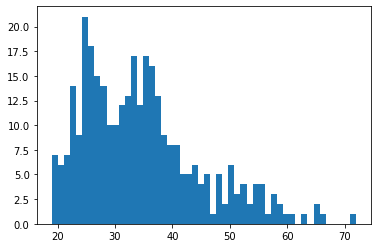

In [126]:
# plot age at histogram

plt.hist(dnd_sales_df["Age_at_Shoot_Date"], bins=50)
plt.show()

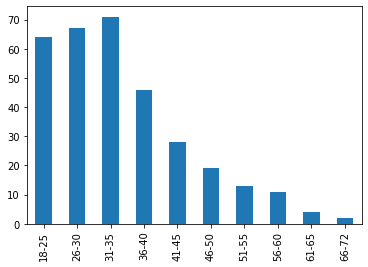

In [127]:
# lets try bar here
dnd_sales_df["Age_Range"].value_counts(sort=False).plot.bar()


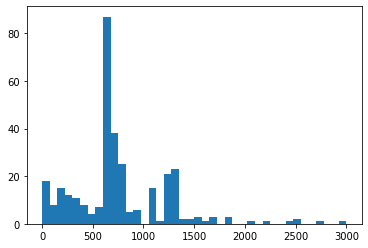

In [128]:
plt.hist(dnd_sales_df["Sales_total"], bins=40)
plt.show()

In [129]:
plt.hist(dnd_highest_codes_df["Sales_total"], bins=40)
plt.show()

NameError: ignored

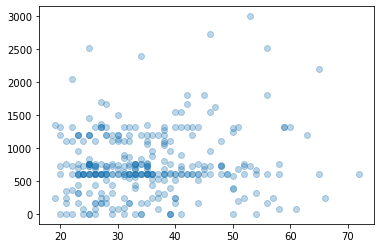

In [134]:
# This graph improved I might be able to use
# showing: no real correlation between age and sales total
plt.scatter(dnd_sales_df["Age_at_Shoot_Date"],dnd_sales_df["Sales_total"], alpha=.3)
plt.show()

In [ ]:
# This graph is also a maybe, but but I could use a box plot maybe
# showing no real correlation - sample size for the latter age group
plt.scatter(dnd_sales_df["Age_Range"],dnd_sales_df["Sales_total"], alpha=.1)
plt.show()

Text(0.5, 0.98, '')

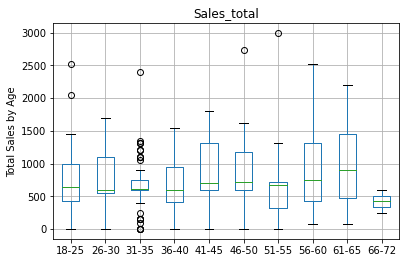

In [135]:
# consistent result across Age Ranges but I need
ax = dnd_sales_df.boxplot(by="Age_Range", column="Sales_total")
ax.set_xlabel('')
ax.set_ylabel("Total Sales by Age")
plt.suptitle("")

In [ ]:
# so I could take the mean sale, with an error bar to show there isn't much
# difference .



# bring some of my old functions in.  


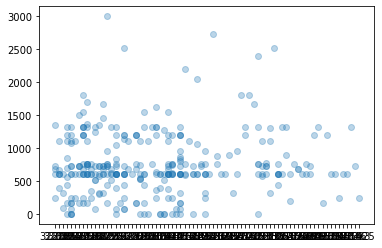

In [133]:
plt.scatter(dnd_sales_df["zip_code"],dnd_sales_df["Sales_total"], alpha=.3)
plt.show()

# I need to find a better way to show this graph.  I like that it splits the 
# sales data geographically, but the level is granularity is too much
# change graph of zip code so that codes are vertical


In [ ]:
dnd_highest_codes_df["zip_code"].value_counts()

In [ ]:
dnd_highest_codes_df["Hair"].value_counts()

In [ ]:
dnd_lowest_codes_df["zip_code"].value_counts()

In [ ]:
dnd_lowest_codes_df["Hair"].value_counts()

In [ ]:
dnd_highest_codes_df["zip_code"].value_counts().plot()

In [ ]:
# cross tab - I will need to bin /cut the Sales sessions to do an evocative crosstab
# but I can try it now, just to see
# based on this I need to bin the Sales into maybe 5 categories. 
# and bin the zip codes into 2/4/8 categories

cross=pd.crosstab(dnd_sales_df["Sales_total"], dnd_sales_df["Hair"])
cross

In [ ]:
cross.plot();

In [ ]:
# lets check the sales data for the hair and no hair groups
cond_mu_only = dnd_sales_df["Hair"] == "no"
cond_wHair = dnd_sales_df["Hair"] == "yes"


dnd_makeup_only_df = dnd_sales_df[cond_mu_only]
dnd_w_hair_df = dnd_sales_df[cond_wHair]

In [ ]:
dnd_makeup_only_df.describe() # 

,Session_Fee,Sales_total,Age_at_Shoot_Date
count,231.000000,231.000000,231.000000
mean,92.380952,711.567100,34.662338
std,42.195223,455.453347,10.877112
min,0.000000,0.000000,19.000000
25%,99.000000,515.000000,26.000000
50%,99.000000,600.000000,33.000000
75%,99.000000,950.000000,40.000000
max,249.000000,2730.000000,72.000000


In [ ]:
dnd_w_hair_df.describe() # this result is very interesting.  it implies clients 
# who get hair done spend and average of $100 more!
# plus we work one hour less! and the morale of the team improves because the 
# stylist gets paid more. 

# perform a t-test with these two sample / or it might be one sample tests
# vs the popuplation.  

,Session_Fee,Sales_total,Age_at_Shoot_Date
count,94.000000,94.000000,94.000000
mean,107.180851,803.287234,34.553191
std,45.255300,518.220438,8.573047
min,0.000000,0.000000,22.000000
25%,99.000000,600.000000,28.000000
50%,99.000000,679.500000,33.000000
75%,99.000000,1057.500000,39.750000
max,249.000000,3000.000000,59.000000


In [ ]:
dnd_sales_df["Hair"].dtype

CategoricalDtype(categories=['no', 'yes'], ordered=False)

In [ ]:
# pie chart of Makeup vs hair 
# turn into Df first !!!
# Hair value df!
dnd_hair_df = pd.DataFrame({"with_hair_stylist" :dnd_sales_df["Hair"].value_counts()})



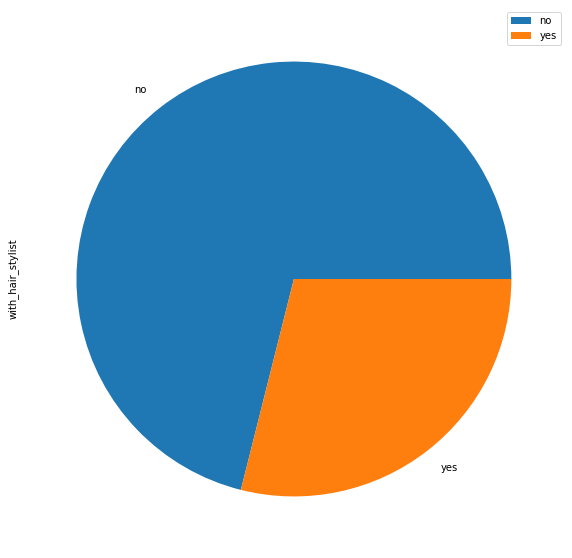

In [ ]:
dnd_hair_df.plot.pie(y="with_hair_stylist", figsize=(10,10))
plt.show()

In [ ]:

def get_confidence_interval(sample, confidence_level):

  # in because we like some np functions 
  # make a np array for our sample
  sample_np_array = np.array(sample)

  # variables we need for the calculations are 
  # std_dev, sample size, t-statistic

  std_dev = np.std(sample_np_array, ddof=1)
  sample_size = sample_np_array.shape[0]

  #here's the new one: from scipy stats 
  # Percent Point Function (Inverse of CDF)
  # this value take ?? percent of data that  as a parameter
  # does same thing as university of I. applet
  tstat = stats.t.ppf(1 - ((1 - confidence_level) / 2), sample_size-1)

  # need the sample mean as x_bar
  x_bar = np.mean(sample_np_array)

  # I need the standard error =
  # standard deviation / squareroot of sample size
  std_err = (std_dev/np.sqrt(sample_size))

  # now I need the Margin of Error
  # which is tstat * standard error
  moe = tstat*std_err

  # then for info purposes lets return the 
  # lower and upper bounds

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  confidence_int = namedtuple("confidence_interval", ["lower_bound", "xbar","upper_bound","moe", ])

  # return (lower_bound, x_bar, upper_bound, moe)
  return confidence_int(lower_bound, x_bar, upper_bound, moe)

In [ ]:
mu_sample_values = get_confidence_interval(dnd_makeup_only_df["Sales_total"], .95)
hair_sample_values = get_confidence_interval(dnd_w_hair_df["Sales_total"], .95)

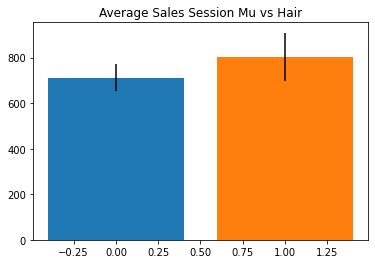

In [ ]:
# this graph I"m keeping and improving in 
plt.bar(0, height=mu_sample_values.xbar, yerr=mu_sample_values.moe)
plt.bar(1, height=hair_sample_values.xbar, yerr=hair_sample_values.moe)

plt.title('Average Sales Session Mu vs Hair')

plt.show()

In [ ]:
from scipy import stats


In [ ]:
stats.ttest_ind(dnd_makeup_only_df["Sales_total"], dnd_w_hair_df["Sales_total"])

Ttest_indResult(statistic=-1.5804058267736067, pvalue=0.11499268514229982)

I believe I would interpret these results as:
Assuming a 95% confidence level - Based on a tstat of -1.58 and pvalue of approximately .11499,
I FAIL to reject the null hypothesis that clients who get make-up only spend the same amount on average as clients who get professional hair and make-up. 


In [ ]:
# try a one sample ttest
dnd_sales_df["Sales_total"].mean()

738.0953846153847

In [ ]:
stats.ttest_1samp(dnd_w_hair_df["Sales_total"], 738)

Ttest_1sampResult(statistic=1.221455529067876, pvalue=0.22500091941150033)

In [ ]:
# bar and pie chart.  Favorites categories maybe top 10.  
print(dnd_sales_df["Favorite"].value_counts().sum())
dnd_sales_df["Favorite"].value_counts()


In [ ]:
# df of preference value counts  
dnd_preference_df = pd.DataFrame({"Preference" :dnd_sales_df["Favorite"].value_counts()})
#top 10 preference


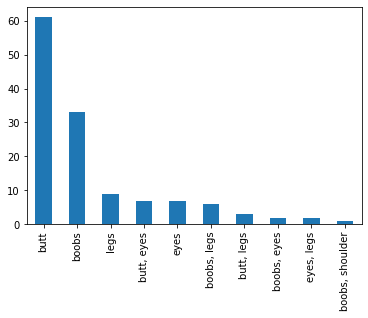

In [ ]:
dnd_preference_df["Preference"].iloc[1:11,].sort_values(ascending=False).plot.bar()
#this y axis should be percentages rather can counts

<function matplotlib.pyplot.show>

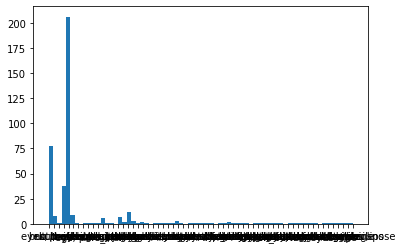

In [ ]:
#lets graph the distribution with a histogram

plt.hist(x=dnd_df["Favorite"], bins=70)
plt.show

# **Sexy in the City**
### Or Can data driven analysis help you stop worrying and increase your hourly wage by $35 while photographing people in undies?

  With the rise of social media and cellphones it’s safe to say anyone can consider themselves to be an accomplished amateur photographer.  But while the amateur and hobbyist can point and shoot indiscriminately,  in order to earn a living creating images, the professional must be discerning about what they capture  - and thus the various genre’s of professional photography arrise.  Parsing the topic even further, if your metric is gross income, all photographic genres are not created equal.  Which brings us to the subject of our exploration - a relatively obscure but potentially lucrative niche genre of photography, called Intimate Portraiture, or more commonly known as Boudoir Photography.   If photography studios were restaurant’s, think of the boudoir photo studio as the equivalent of a restaurant that’s only open for lunch or breakfast…in bed. 

  For this project I was able to source data from the most successful boudoir photography studio in Northeast Florida - a little mom-and-pop shop called Diamonds and Desire Boudoir Photography.    (Link) To put the success of this two person operation in context, the nation wide average hourly wage for professional photography according to ZipRecruiter as of July 20, 2020 was \$21\/hour, while the average for northeast florida was \$19\/hour.   However D&D Photography averages $80\/man-hour.  

**Chart comparing average hourly.**

Although the business had been in operation for over 10 years,  and the studio did have other sources of income(other genres of photography, studio equipment rentals, etc), the data set I was able to source amounted to gross sales totaling a little less than a quarter of a million dollars over a 6 year period.  With that said, the goal of the project was to give 3 data driven, actionable insights, based on an anatomy of the specific business model of Diamonds and Desire.   That business model anatomy was comprised of: Preshoot Consultation(Booking the client), Photoshoot (executing the service),  and Sales Sessions.

### Delectable Data left on the table

Let’s begin with insight relevant to the Preshoot consultation as this grants further context into the domain in general.  The data for the project was compiled from records of the consultations and records of sales.  So while it does include features like booking date, date of birth, zip code, session fee, and sales total, etc. There were other variables that were almost always revealed due to the nature of the consultation, but not recorded with the proper nuance or consistency: Occasion of shoot( anniversary, birthday, father’s day, valentine’s day, x-mas, or perhaps no occasion!). Being located in a navy town, many of the clients were in the military, or military spouses, but this was not consistently recorded.  Ethnicity and gender, were also not recorded with enough nuance to be useful. From the sales information, the sales total and product quantity/type was documented, but the type of photograph was not categorized in the sales data with enough nuance.  Were the photographs close up, wide shots, black and white, color, high key, or low key?   These are all metrics which could affect the businesses marketing decision and perhaps shooting practices. And once again this is data that was collected and available, but just not recorded suitably.  Therefore I would recommend adding these to the variables recorded going forward.  

### “Hmm! I like my …” - anonymous client reaction

As for insight regarding the second facet of the business, the actual photoshoot, there was a particular feature extremely relevant to service execution and general success of the business. The “Favorite” variable was defined as which body part the client was most interested in highlighting or having exceptional photographs of.  So it follows that the Favorite feature revealed what most clients expect a boudoir photographer to be good at shooting.  In contrast, while a family photographer would be expected to deliver solid group shots - relying on skill at herding and staging people, a succesful wedding photographer might develop skill at recognizing or staging beautiful moments, a headshot specialist might gather an arsenal of corny jokes.  But in boudoir photography, the data shows, that among clients that have a preference,  the expectation by an almost two to one margin is for exceptional shots of… the booty. 

**Chart of Favorite values counts**

 To thrive one must cultivate an appreciation of the booty, in all sizes and shapes - the right wardrobe and posing for the booty, the right angle and lens for the booty.  The bottom line… your corny jokes aren’t going to help, because if you’re going to meet client expectations, it’s literally your job to present the booty in it’s best light.

### Too Sexy for my Zip Code?

Now it’s time to get to, dare I say, the sexist feature in the data set: Sales Total.  Ideally we’d be able to gather from the data which other feature correlates most closely with a high sales total.  Although there’s a common tendency to be seduced by the notion of wealth and zip code tracking closely,  our data does not support this.  In this business domain zip code does not correlate with a higher sales. 

Chart of Zip code vs Sales Total

Even when we examine the age of the clients and sales records there is still no obvious correlation.  All age ranges tend toward the same mean sales total.

**Chart of Age Range vs Sales Total**

These were disappointing results as they could have been exploited via marketing.      The quest for the elusive highly correlated feature-pair seemed lost, until we examined one innocuous variable: “Hair.”  This feature was simply a record of whether the photographer was to schedule a professional hairstylist on the day of the shoot.  (Professional make up artist services were included with every shoot.)  The distribution of make-up only clients vs those who chose to pay an additional fee for professional hair styling is illustrated below:

**Pie chart Make-up only  vs Hair and Make-up**

### Hair Love

Surprisingly, when compare to each other the average sales total for a client who opted for a hair stylist was nearly \$100 more than clients who only received professional makeup.  That is an 11% increase in sales at no expense to the business!  So, clients who had already spent additional money for the service went on to spend even more.  

**Chart of Make-up only vs Hair and Make-up mean sales**

But the most starling consequence of this discovery was yet to come.  It turns out that since professional hair service takes about 1 hour of the photoshoot time, that is time that the photographer is free to do other things, be it book clients and administrative tasks, or pursue leisure.  In addition, the amount of photos taking during the shoot are a factor of the time spent shooting.  Thus one hour less photos taken reduce the post processing workload and time.  So, where as a shoot with make-up only, may take 9 hours (1 consult, 3 hour shoot, 4 hours post, 1 hour sales) and result in an average sale of \$711 or \\$79\/hour.  A shoot with make up and professional hair styling will only take 7 hours (1 consult, 2 hour shoot, 3 hours post, 1 hours sales)  and result in an average sale of \\\$803 or \\\$114\/hour!  An increase of 35  hour! \*

### Conclusion: 

In summary, this project shows that even a “mom-and-pop shop” small business can gain valuable insights across all aspects their business domain through data analysis.  These insights can  be specific and revelvant to a particular business model and positively effect the bottom line.

\*  A two sample TTest was conducted with the following results: Assuming a 95% confidence level - Based on a tstat of -1.58 and pvalue of approximately .11499, I FAIL to reject the null hypothesis that clients who get make-up only spend the same amount on average as clients who get professional hair and make-up.
